In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import toml
from plotnine import (
    aes,
    element_text,
    facet_grid,
    geom_bar,
    geom_point,
    ggplot,
    ggsave,
    theme,
    theme_bw,
    xlim,
    ylim,
)

In [2]:
# set paths and load data
path = pathlib.Path("../../Data/clean/Plate2/nELISA_plate_430420_SHSY5Y_clean.parquet")
toml_path = pathlib.Path("../../../1.Exploratory_Data_Analysis/utils/params.toml")

df = pd.read_csv(path)
params = toml.load(toml_path)
list_of_treatments = params["list_of_treatments"]["treatments"]

In [3]:
print(df.columns.to_list())

['Activin A [NSU]', 'AITRL (GITR Ligand) [NSU]', 'Amphiregulin [NSU]', 'Amyloid beta [NSU]', 'APRIL [NSU]', 'BAFF [NSU]', 'BCMA (TNFRSF17) [NSU]', 'BDNF [NSU]', 'BMP2 [NSU]', 'BMP3 [NSU]', 'BMP4 [NSU]', 'BMP6 [NSU]', 'BMP7 [NSU]', 'BMP9 [NSU]', 'C5_C5a [NSU]', 'Calbindin [NSU]', 'CCL1 [NSU]', 'CCL11 [NSU]', 'CCL13 [NSU]', 'CCL15 [NSU]', 'CCL16 [NSU]', 'CCL17 [NSU]', 'CCL18 [NSU]', 'CCL19 [NSU]', 'CCL2 [NSU]', 'CCL20 [NSU]', 'CCL21 [NSU]', 'CCL22 [NSU]', 'CCL23 [NSU]', 'CCL24 [NSU]', 'CCL25 [NSU]', 'CCL27 [NSU]', 'CCL28 [NSU]', 'CCL3 [NSU]', 'CCL4 [NSU]', 'CCL5 [NSU]', 'CCL7 [NSU]', 'CCL8 [NSU]', 'CD14 [NSU]', 'CD163 [NSU]', 'CD276 (B7-H3) [NSU]', 'CD27L [NSU]', 'CD30 [NSU]', 'CD40L [NSU]', 'CNTF [NSU]', 'CRP [NSU]', 'CX3CL1 [NSU]', 'CXCL1 [NSU]', 'CXCL10 [NSU]', 'CXCL11 [NSU]', 'CXCL12 (alpha) [NSU]', 'CXCL12 (beta) [NSU]', 'CXCL13 [NSU]', 'CXCL14 [NSU]', 'CXCL16 [NSU]', 'CXCL17 [NSU]', 'CXCL3 [NSU]', 'CXCL4 [NSU]', 'CXCL5 [NSU]', 'CXCL6 [NSU]', 'CXCL7 [NSU]', 'CXCL9 [NSU]', 'Cytochrom

In [4]:
# output path for the treatment df
output_path = pathlib.Path(
    f"./results/SHSY5Y_all_cytokine_values_per_treatment_per_well.csv"
)
df.to_csv(output_path, index=False)

/home/lippincm/miniconda3/envs/Interstellar/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 4 in image.
/home/lippincm/miniconda3/envs/Interstellar/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: ./figures/TNF_alpha_IL-1_beta_scatter_plot.png


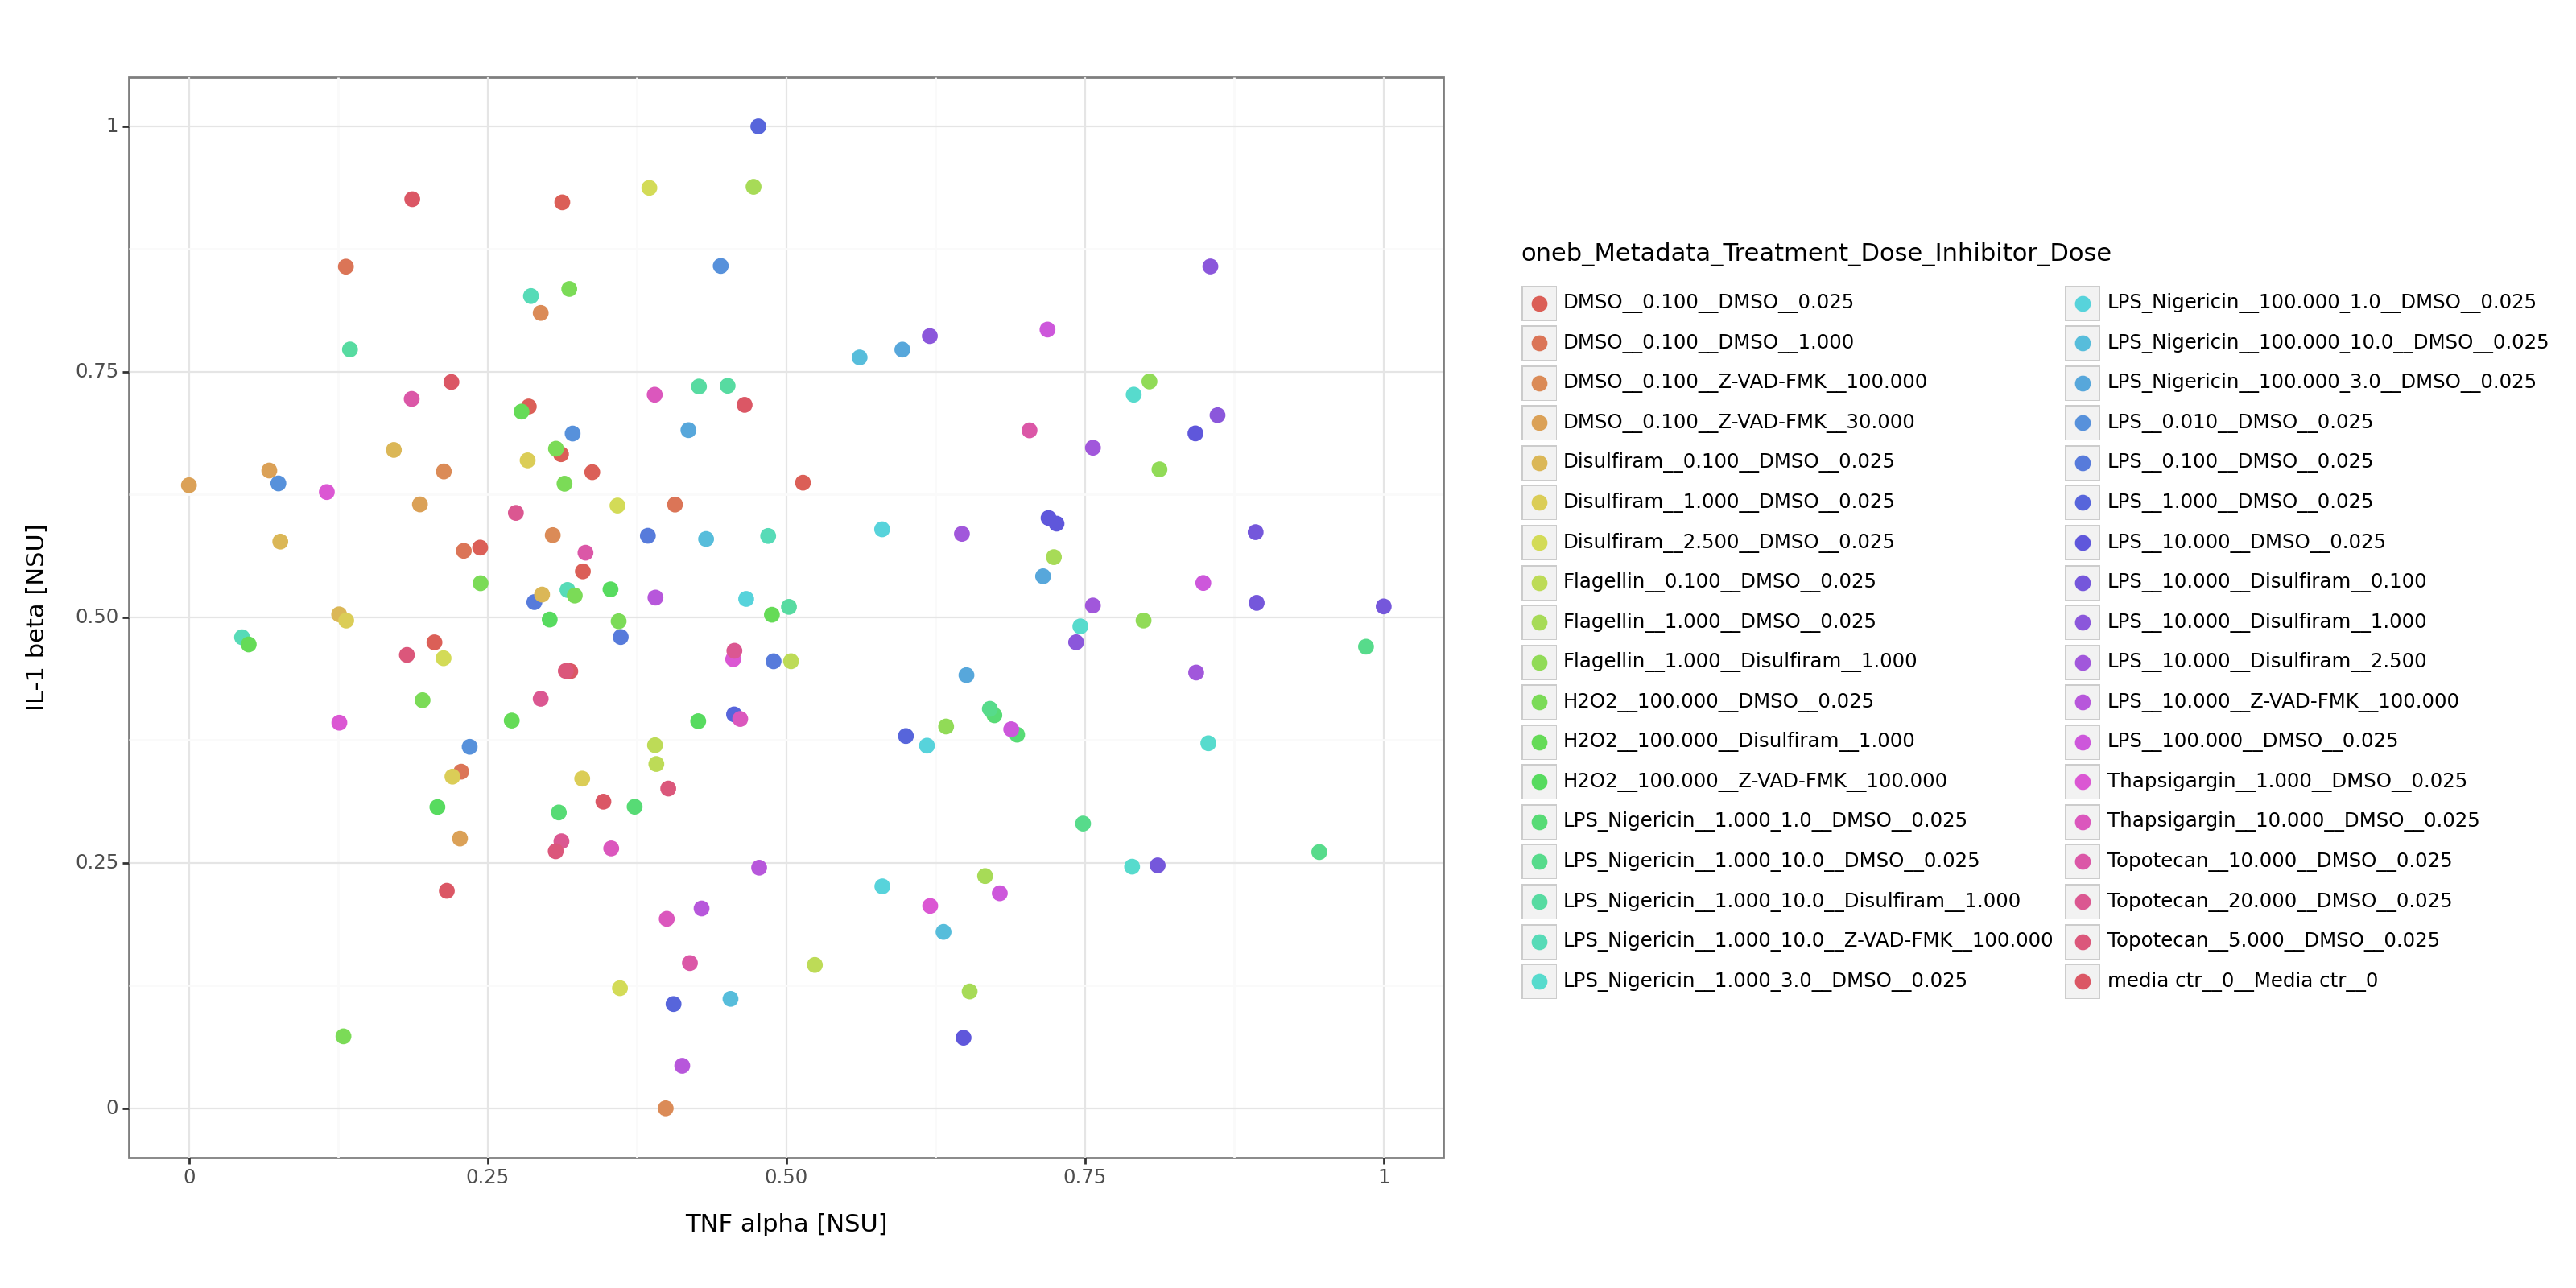

<Figure Size: (1600 x 800)>

In [5]:
# plot scatter plot of all the treatment groups for IL-1 beta

p = (
    ggplot(
        df,
        aes(
            x="TNF alpha [NSU]",
            y="IL-1 beta [NSU]",
            color="oneb_Metadata_Treatment_Dose_Inhibitor_Dose",
        ),
    )
    + geom_point(size=3)
    + theme_bw()
    + ylim(0, 1)
    + xlim(0, 1)
)

ggplot.save(
    p,
    filename="./figures/TNF_alpha_IL-1_beta_scatter_plot.png",
    width=6,
    height=4,
    units="in",
    dpi=300,
)
p = p + theme(figure_size=(16, 8))
p

In [6]:
df_treatment = df.drop(
    columns=["Metadata_position_x", "fourb_Metadata_Treatment_Dose_Inhibitor_Dose"]
)
df_treatment = df_treatment.melt(
    id_vars=["oneb_Metadata_Treatment_Dose_Inhibitor_Dose"],
    value_vars=df_treatment.columns.to_list()[1:],
    var_name="Cytokine",
    value_name="Cytokine_Value",
)

In [7]:
# outpath for the melted df
output_path = pathlib.Path(
    f"./results/SHSY5Y_all_cytokine_values_per_treatment_per_well_melted.csv"
)
df_treatment.to_csv(output_path, index=False)

In [8]:
df_treatment

,oneb_Metadata_Treatment_Dose_Inhibitor_Dose,Cytokine,Cytokine_Value
0,DMSO__0.100__DMSO__1.000,AITRL (GITR Ligand) [NSU],0.564662
1,DMSO__0.100__Z-VAD-FMK__100.000,AITRL (GITR Ligand) [NSU],0.856272
2,DMSO__0.100__Z-VAD-FMK__30.000,AITRL (GITR Ligand) [NSU],0.640559
3,DMSO__0.100__Z-VAD-FMK__100.000,AITRL (GITR Ligand) [NSU],0.987796
4,DMSO__0.100__Z-VAD-FMK__30.000,AITRL (GITR Ligand) [NSU],0.684927
...,...,...,...
28793,Topotecan__5.000__DMSO__0.025,inducer_dose_unit,nM
28794,media ctr__0__Media ctr__0,inducer_dose_unit,NaN
28795,media ctr__0__Media ctr__0,inducer_dose_unit,NaN
28796,media ctr__0__Media ctr__0,inducer_dose_unit,NaN


In [9]:
# facet grid of treatment and dose with TNF alpha
p = (
    ggplot(
        df_treatment,
        aes(
            x="oneb_Metadata_Treatment_Dose_Inhibitor_Dose",
            y="Cytokine_Value",
            fill="Cytokine",
        ),
    )
    + geom_bar(stat="identity", position="dodge")
    + facet_grid(". ~ Cytokine")
    + theme_bw()
    + theme(axis_text_x=element_text(angle=90, hjust=1))
)

p = p + theme(figure_size=(16, 8))
p

TypeError: '<' not supported between instances of 'float' and 'str'